In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam



#mpl.use('TkAgg',force=True)

%matplotlib inline

## Analysing logistic regression and the sigmoid function

In [2]:
def sigmoid(X,w):
    return 1/(1+np.exp(-X@w))

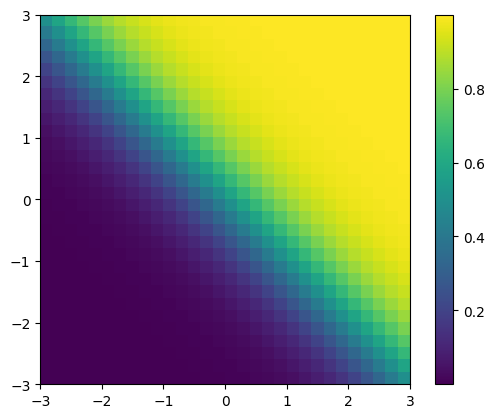

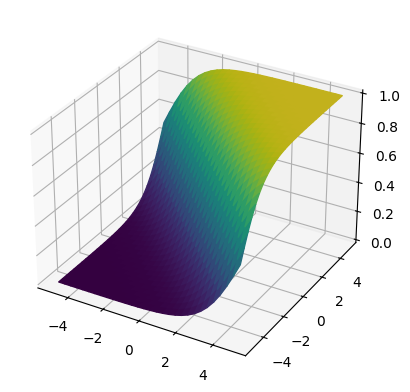

In [188]:
W= np.array([0,1,1])
xs= np.linspace(-5,5,30)
ys= np.linspace(-5,5,30)
x_mesh,y_mesh= np.meshgrid(xs,ys)
X= np.column_stack((np.ones(len(xs)*len(ys)),x_mesh.ravel(),y_mesh.ravel()))
Y= sigmoid(X,W)

im=plt.imshow(Y.reshape(x_mesh.shape),extent=[-3,3,-3,3],origin='lower')
plt.colorbar(im)
plt.show()


fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
plot= ax.plot_surface(x_mesh,y_mesh,Y.reshape(x_mesh.shape),facecolors=plt.cm.viridis(Y.reshape(x_mesh.shape)))
plt.show()



In [3]:
#Cost for an XOR Gate 
def cost(w,X,Y):
    return -np.sum(Y*np.log(sigmoid(X,w))+(1-Y)*np.log(sigmoid(-X,w)),axis=0)

def grad_cost(w,X,Y):
    return -np.sum(X*(Y-sigmoid(X,w).reshape(Y.shape)),axis=0)

def ADAM(func,grad,init_pos,lr=0.001,beta_1=0.9,beta_2=0.99,eps=1e-8,max_iters=100000,tol=1e-4,**params):
    pos=init_pos
    m= np.zeros_like(pos)
    s= np.zeros_like(pos)
    
    for t in tqdm(range(1,max_iters+1)):
        g= grad(pos,**params)
        if np.all(np.abs(g)<tol):
            print(f"Converged in {t} iterations")
            break
                  
        m= beta_1*m +(1-beta_1)*g
        s= beta_2*s +(1-beta_2)*g**2
        m_hat_t= m/(1-beta_1**t)
        s_hat_t= s/(1-beta_2**t)
        pos-= lr*m_hat_t/(np.sqrt(s_hat_t)+eps)
            
    

    return pos,func(pos,**params)


def MSE(w,X,Y):
    return np.sum((Y-sigmoid(X,w).reshape(Y.shape))**2,axis=0)

def grad_MSE(w,X,Y):
    sig= sigmoid(X,w).reshape(Y.shape)
    return -2*np.sum(X*(Y-sig)*sig*(1-sig),axis=0)


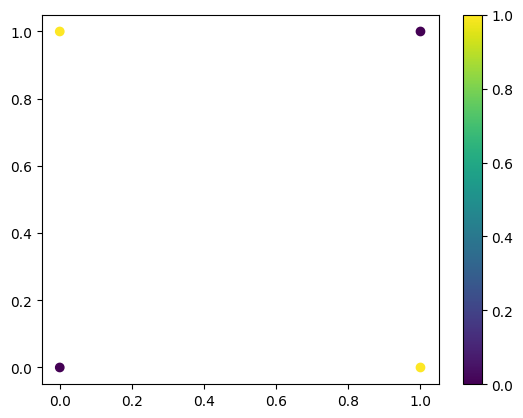

In [4]:
X= np.array([[1.,1.],[1.,0.],[0.,1.],[0.,0.]])
Y= np.array([0.,1.,1.,0.])

plot=plt.scatter(X[:,0],X[:,1],c=Y)
plt.colorbar(plot)
plt.show()

In [191]:
wxs= np.linspace(-4,4,30)
wys= np.linspace(-4,4,30)

Wx,Wy= np.meshgrid(wxs,wys)
W_cost= np.vstack((Wx.ravel(),Wy.ravel()))

cost_fs= cost(W_cost,X,Y[:,np.newaxis])

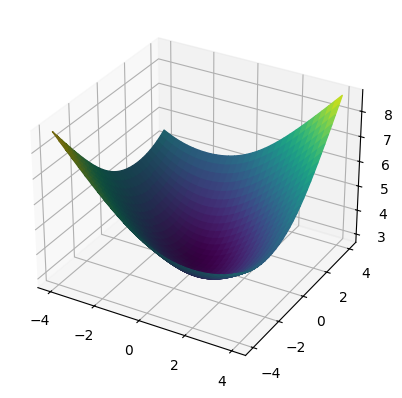

In [192]:
#mpl.use("TkAgg",force=True)
fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
norm = plt.Normalize(cost_fs.min(), cost_fs.max())
colors= plt.cm.viridis(norm(cost_fs.reshape(Wx.shape)))
im= ax.plot_surface(Wx,Wy,cost_fs.reshape(Wx.shape),facecolors=colors)

In [193]:
#X_train= np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
X_train= PolynomialFeatures(degree=2).fit_transform(X)
Y= Y[:,np.newaxis]

In [194]:
W_hat,func_optimum= ADAM(cost,grad_cost,np.random.random(X_train.shape[1]),tol=1e-8,**{'X':X_train,'Y':Y})

 79%|███████▊  | 78645/100000 [00:02<00:00, 27785.19it/s]

Converged in 78646 iterations


In [195]:
print(f"{W_hat}\n{func_optimum}\n{sigmoid(X_train,W_hat)}")

[-18.08220147  17.89484127  18.23185463  18.48019193 -73.08860447
  18.14317856]
[36.84147913 36.58566351 36.58566351 36.16440299]
[9.99941192e-09 9.99999989e-01 9.99999989e-01 1.40281266e-08]


C:\Users\prith\AppData\Local\Temp\ipykernel_18092\4183656517.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X@w))


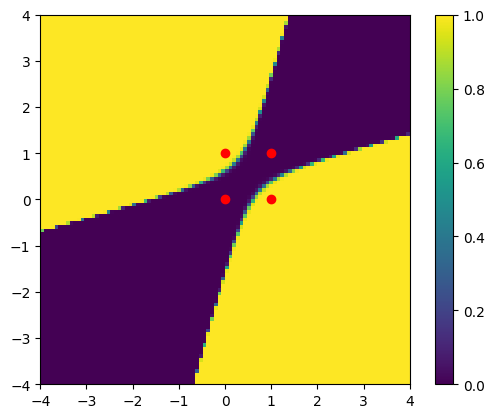

In [196]:
xs= np.linspace(-4,4,100)
ys= np.linspace(-4,4,100)
X_mesh,Y_mesh= np.meshgrid(xs,ys)
#X_t= np.column_stack((np.ones_like(X_mesh.ravel()),X_mesh.ravel(),Y_mesh.ravel()))
X_t= np.column_stack((X_mesh.ravel(),Y_mesh.ravel()))
X_t= PolynomialFeatures(degree=2).fit_transform(X_t)

im= plt.imshow(sigmoid(X_t,W_hat).reshape(X_mesh.shape).round(6),extent=[-4,4,-4,4],origin='lower')
plt.scatter(X[:,0],X[:,1],c='Red')
plt.colorbar(im)
plt.show()

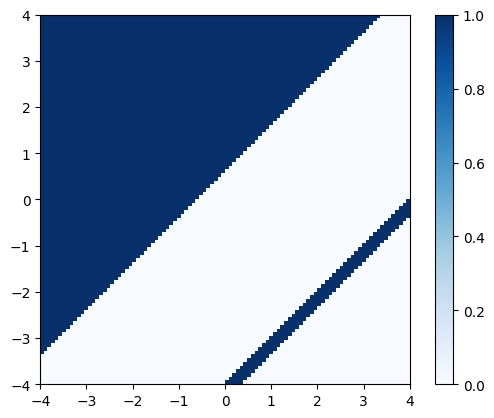

In [197]:
xs= np.linspace(-4,4,100)
ys= np.linspace(-4,4,100)
X_mesh,Y_mesh= np.meshgrid(xs,ys)
Z= np.astype(((Y_mesh-X_mesh)>0.6)|(((Y_mesh-X_mesh)<-4)&((Y_mesh-X_mesh)>-4.4)),float)

im=plt.imshow(Z,extent=[-4,4,-4,4],origin='lower',cmap='Blues')
plt.colorbar(im)
plt.show()

In [198]:
#X_train= np.column_stack((np.ones_like(X_mesh.ravel()),X_mesh.ravel(),Y_mesh.ravel()))
X= np.column_stack((X_mesh.ravel(),Y_mesh.ravel()))
X_train= PolynomialFeatures(degree=3).fit_transform(X)
Y=Z.reshape(len(X),-1)
W_hat,func_optimum= ADAM(cost,grad_cost,np.random.random(X_train.shape[1]),tol=1,**{'X':X_train,'Y':Y})

 57%|█████▋    | 56760/100000 [00:29<00:22, 1948.93it/s]


Converged in 56761 iterations


C:\Users\prith\AppData\Local\Temp\ipykernel_18092\4183656517.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X@w))
C:\Users\prith\AppData\Local\Temp\ipykernel_18092\2846203336.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y*np.log(sigmoid(X,w))+(1-Y)*np.log(sigmoid(-X,w)),axis=0)
C:\Users\prith\AppData\Local\Temp\ipykernel_18092\2846203336.py:3: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y*np.log(sigmoid(X,w))+(1-Y)*np.log(sigmoid(-X,w)),axis=0)


In [199]:
print(f"{W_hat}\n{func_optimum}\n{sigmoid(X_train,W_hat)}")

[-37.43549717 -43.6866892   43.6866892   27.21010029 -54.41385744
  27.21010029  -3.48664176  10.45541687 -10.45541687   3.48664176]
[168675.04363489 183865.27541738 197498.79570854 ... 133466.26130646
 151897.8175735  168675.04363489]
[6.11007824e-17 2.11777549e-18 1.03598282e-19 ... 1.48082750e-13
 2.50474811e-15 6.11007824e-17]


In [200]:
Y_pred=np.round(sigmoid(X_train,W_hat))
np.unique(Y_pred,return_counts=True)

(array([0., 1.]), array([5482, 4518]))

In [201]:
np.unique(Y.reshape(-1)==Y_pred,return_counts=True)

(array([ True]), array([10000]))

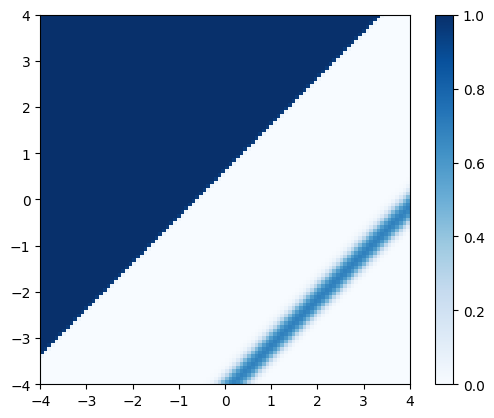

In [202]:
im=plt.imshow(sigmoid(X_train,W_hat).reshape(X_mesh.shape),extent=[-4,4,-4,4],origin='lower',cmap='Blues')
plt.colorbar(im)
plt.show()

In [21]:
X= np.array([[1,1],[1,0],[0,1],[0,0]])
Y= np.array([0,1,1,0])


model= Sequential([Input((2,))])
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.1),metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history= model.fit(X,Y,epochs=200,verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6944
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6927
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.6929
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6907
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6891
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.6880
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7500 - loss: 0.6858
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6823
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.6779
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.6730
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6673
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss

In [23]:
model.get_weights()

[array([[ 7.7027173,  8.872003 ],
        [-8.520701 , -8.191091 ]], dtype=float32),
 array([-4.061162,  4.203864], dtype=float32),
 array([[ 9.744589],
        [-9.418447]], dtype=float32),
 array([4.5798435], dtype=float32)]

In [24]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.00906353],
       [0.9905954 ],
       [0.98797107],
       [0.01061372]], dtype=float32)

In [210]:
xs= np.linspace(-4,4,100)
ys= np.linspace(-4,4,100)
X_mesh,Y_mesh= np.meshgrid(xs,ys)
#X_t= np.column_stack((np.ones_like(X_mesh.ravel()),X_mesh.ravel(),Y_mesh.ravel()))
X_t= np.column_stack((X_mesh.ravel(),Y_mesh.ravel()))


y_pred= model.predict(X_t)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


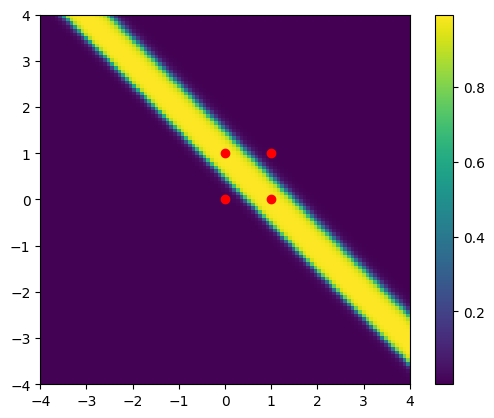

In [211]:
im= plt.imshow(y_pred.reshape(X_mesh.shape),extent=[-4,4,-4,4],origin='lower')
plt.colorbar(im)
plt.scatter(X[:,0],X[:,1],c='Red')
plt.show()
